In [1]:
from dask.distributed import LocalCluster

# https://forum.access-hive.org.au/t/netcdf-not-a-valid-id-errors/389/12
cluster = LocalCluster(threads_per_worker=1)          # Fully-featured local Dask cluster
client = cluster.get_client()
client

/hpx/Data_impb/kales/conda/envs/myenv/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39001 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:39001/status,
Dashboard: http://127.0.0.1:39001/status,Workers: 56
Total threads: 56,Total memory: 755.78 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44763,Workers: 56
Dashboard: http://127.0.0.1:39001/status,Total threads: 56
Started: Just now,Total memory: 755.78 GiB
Comm: tcp://127.0.0.1:44235,Total threads: 1
Dashboard: http://127.0.0.1:36993/status,Memory: 13.50 GiB
Nanny: tcp://127.0.0.1:41941,


# Import

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
from pathlib import Path
from cmap import Colormap
from string import ascii_lowercase, ascii_uppercase
import numpy as np

In [3]:
%reload_ext watermark
%watermark --iversions -v -m

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.27.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 4.19.0-26-amd64
Machine     : x86_64
Processor   : 
CPU cores   : 56
Architecture: 64bit

distributed: 2024.4.1
numpy      : 1.26.4
cartopy    : 0.23.0
matplotlib : 3.9.2
cmap       : 0.2.0
xarray     : 2024.3.0



# Constants

In [4]:
root_path = '/sto0/data/Intermediate/S-RIP/'
xr.set_options(keep_attrs=True)
#infile_path = Path("/sto0/data/Intermediate/Hunga_Tonga_byAles/ht/")
plt.rcParams.update({"font.size": 25})

# SSWs

In [5]:
inpath = f'{root_path}zonal/common-grid/daily/core/MERRA-2/'

infiles = [
    f'{inpath}MERRA-2_zonal_common-grid_daily_core_2023-11.nc',
    f'{inpath}MERRA-2_zonal_common-grid_daily_core_2023-12.nc',
    f'{inpath}MERRA-2_zonal_common-grid_daily_core_2024-01.nc',
    f'{inpath}MERRA-2_zonal_common-grid_daily_core_2024-02.nc',
    f'{inpath}MERRA-2_zonal_common-grid_daily_core_2024-03.nc']

In [6]:
ds = xr.open_mfdataset(
    infiles,
    parallel=True,  #  will be performed in parallel using dask.delayed
    combine="nested",
    concat_dim=["time"],
)#.pipe(process, deseasonalize=False)
ds#_wo_chem

<xarray.Dataset> Size: 5MB
Dimensions:        (time: 152, lat: 73, pre: 22)
Coordinates:
  * pre            (pre) int32 88B 100000 92500 85000 70000 ... 500 300 200 100
  * lat            (lat) float64 584B -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
  * time           (time) datetime64[ns] 1kB 2023-11-01 ... 2024-03-31
Data variables:
    z              (time, lat, pre) float32 976kB dask.array<chunksize=(30, 73, 22), meta=np.ndarray>
    t              (time, lat, pre) float32 976kB dask.array<chunksize=(30, 73, 22), meta=np.ndarray>
    u              (time, lat, pre) float32 976kB dask.array<chunksize=(30, 73, 22), meta=np.ndarray>
    v              (time, lat, pre) float32 976kB dask.array<chunksize=(30, 73, 22), meta=np.ndarray>
    w              (time, lat, pre) float32 976kB dask.array<chunksize=(30, 73, 22), meta=np.ndarray>
    t2theta        (time, pre) float64 27kB dask.array<chunksize=(30, 22), meta=np.ndarray>
    days_included  (time) float64 1kB 30.0 30.0 30.0 30.0 ... 31.0 31.0 31.0
Attributes:
    land_mask:           0
    author:              Patrick Martineau
    reference:           https://doi.org/10.5194/essd-10-1925-2018
    website:             https://www.jamstec.go.jp/ridinfo/
    contact_address1:    pmartineau@jamstec.go.jp
    contact_address2:    pmartineau.work@gmail.com
    source_reanalysis:   MERRA-2
    original_file_name:  MERRA-2_zonal_common-grid_daily_core_2023-11.nc
    data_realm:          zonal
    data_type:           core

In [7]:
ds_sel = ds['u'].sel(pre = 1000).sel(lat = 60, method = 'nearest').load()

In [8]:
plt.rcParams.update({"font.size": 22})


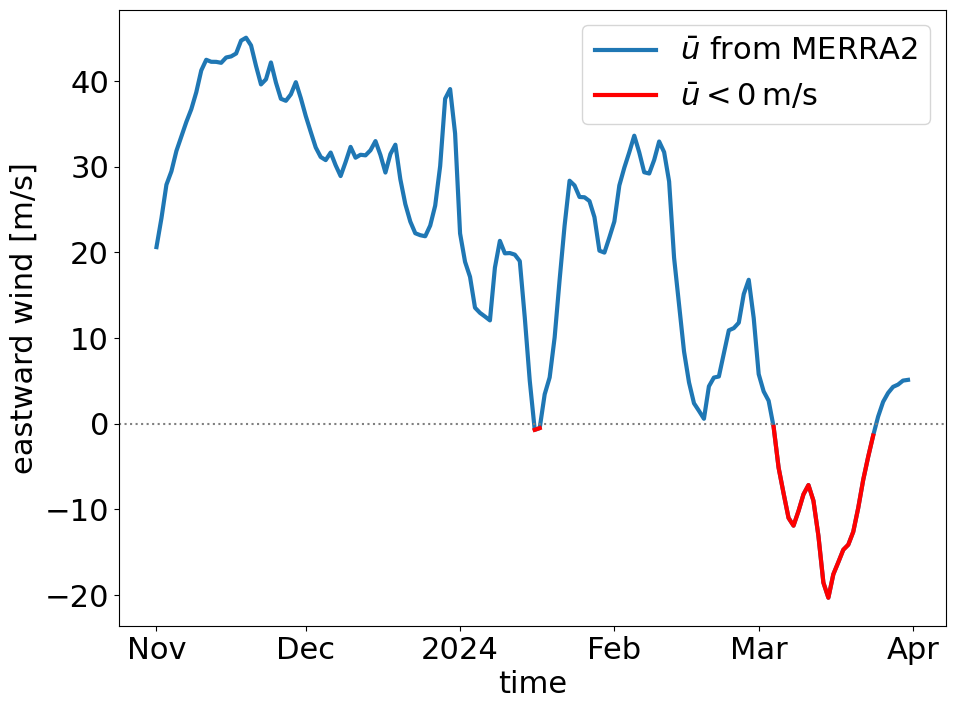

In [10]:
ds_sel.plot(size = 8, lw = 3,  label = r'$\bar{u}$ from MERRA2')
ds_sel.where(ds_sel < 0).plot(lw = 3, c = 'red', label = r'$\bar{u}<0\,\mathrm{m/s}$')
plt.axhline(0, ls = ':', c = 'gray')
plt.ylabel(r'eastward wind [m/s]')
plt.title('')
plt.legend()
plt.savefig('ZMZW60N10hPa_SSWs.pdf', bbox_inches = 'tight')